In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import math

In [2]:
# set de datos
#1) Realizar un análisis estadístico básico del conjunto de datos, como calcular las estadísticas descriptivas (media, mediana, desviación estándar, etc.) 
#y la correlación entre las diferentes características.

#2) Visualizar los datos mediante gráficos para comprender mejor la relación entre las diferentes características y la calidad del vino.
#Por ejemplo, se pueden crear gráficos de dispersión para visualizar la relación entre cada característica y la calidad del vino.

#3) Realizar una limpieza de datos básica para tratar los valores perdidos y 
#los datos atípicos, que pueden afectar la precisión del modelo de regresión.

#4) Preprcesar los datos para meter las etiquetas de los valores buenos y malos

#5) Probarlo con las librerias y luego con el modelo manual y esperar que este bien xd 



# 1- Análisis estadístico

In [3]:
# Cargar el conjunto de datos en un marco de datos
df = pd.read_csv("DiabetesDataSet/diabetes_prediction_dataset.csv")

#Varios valores estadisticos
print(df.describe())


                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [4]:
# Cargar el conjunto de datos en un marco de datos
df = pd.read_csv("DiabetesDataSet/diabetes_prediction_dataset.csv")

# Calcular la matriz de correlación
corr = df.corr()

# Calcular la correlación entre cada variable
corrAG = df.corr()['age']
corrHY = df.corr()['hypertension']
corrHD = df.corr()['heart_disease']
corrBMI = df.corr()['bmi']
corrHbA = df.corr()['HbA1c_level']
corrBG = df.corr()['blood_glucose_level']

# Imprimir la correlación de cada variable con todas las demás variables
#print(corrCA)

# Cuales son los resultados que se tiene de diabetes.
df["diabetes"].unique()

# Cantidad de resutlados tanto que no tienen diabetes como que si tienen
cantidad_diabeticos = np.count_nonzero(df["diabetes"] == 1)
print("Porcentaje diabeticos: ", cantidad_diabeticos/len(df["diabetes"])*100) 

Porcentaje diabeticos:  8.5


# 2- Visualización de los datos

<Axes: >

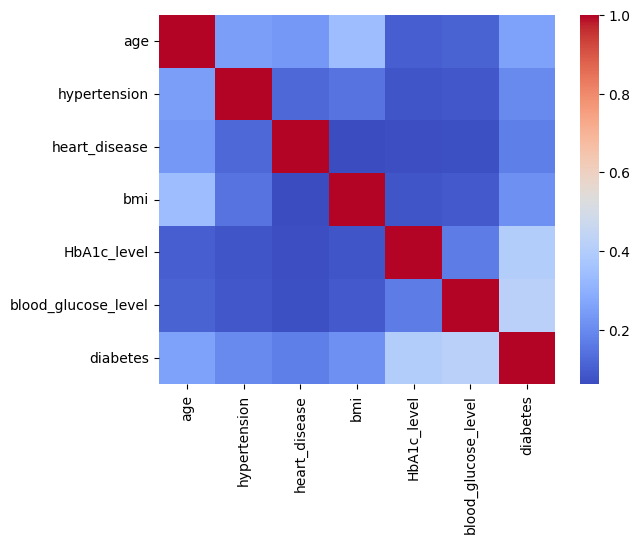

In [5]:
# Graficar la matriz de correlación utilizando un mapa de calor
sns.heatmap(corr, cmap='coolwarm')

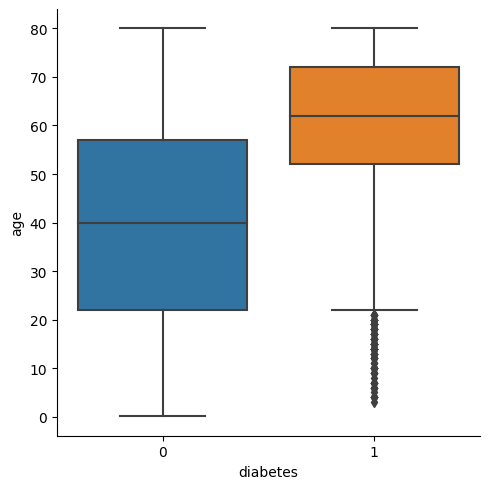

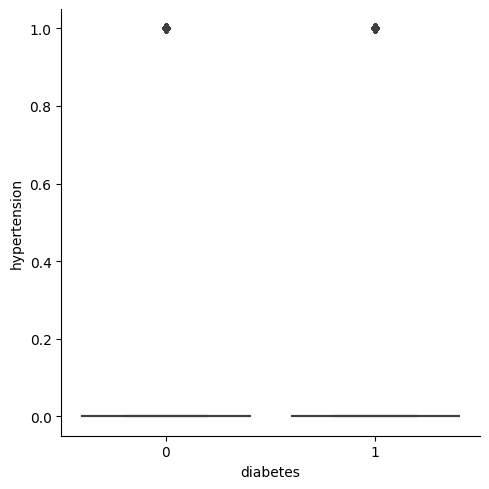

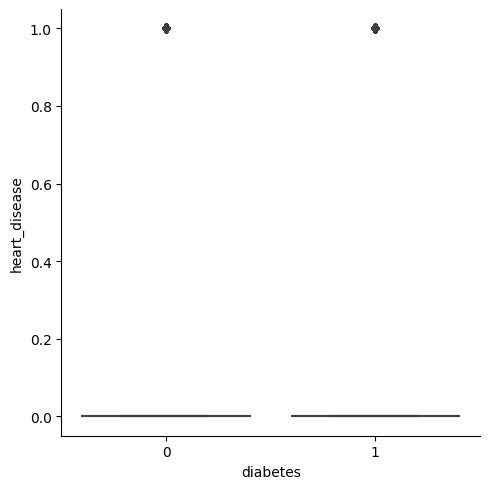

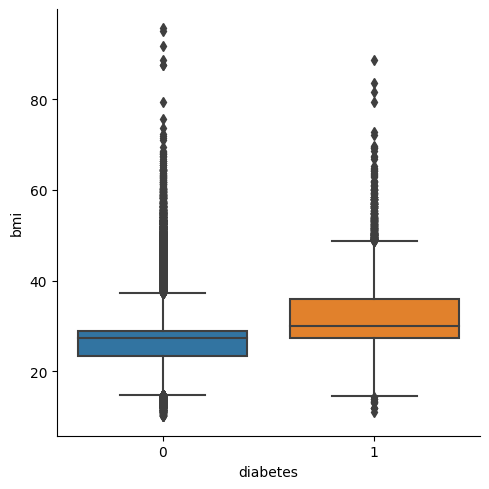

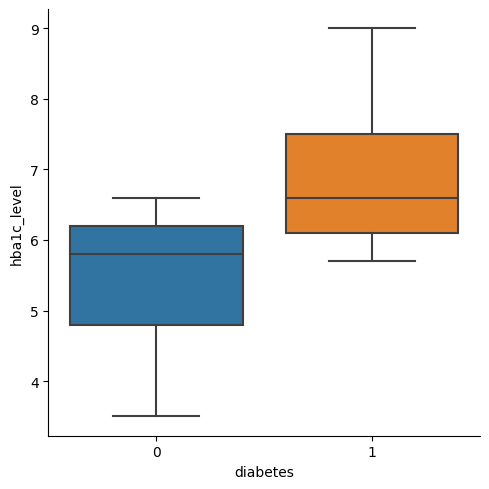

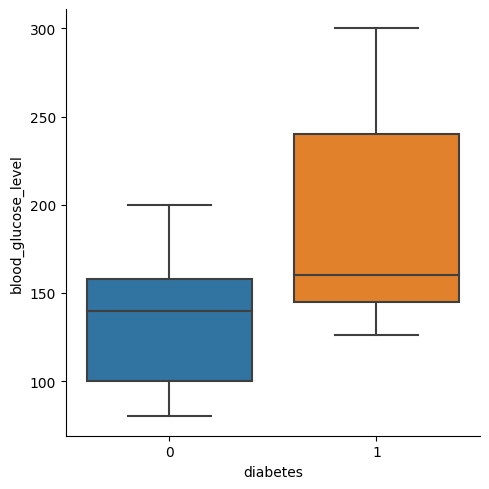

In [6]:
# Crea la gráfica de cajas

# Convierte los nombres de las columnas a minúsculas y reemplaza los espacios por guiones bajos
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Muestra las gráficas de cajas para todos los features
for feature in df.columns[:-1]:
    sns.catplot(data=df, x='diabetes', y=feature, kind='box')


In [7]:
#Nota: Hay muchos valores atípicos

# 3- Normalización

In [8]:
# Cargar el conjunto de datos
data= pd.read_csv("DiabetesDataSet/diabetes_prediction_dataset.csv")

# Imputar valores faltantes
imputer = SimpleImputer(strategy="median")
imputed_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Eliminar valores atípicos
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
data = data[~((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).any(axis=1)]

# Normalizar las variables de entrada
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(imputed_data.iloc[:, :-1]), columns=imputed_data.columns[:-1])

# Agregar la variable de salida
normalized_data["diabetes"] = imputed_data["diabetes"]

# Guardar los datos normalizados en un nuevo archivo CSV
normalized_data.to_csv("DiabetesDataSet/diabetes_normalized_prediction_dataset.csv", index=False)

print(normalized_data.head())


        age  hypertension  heart_disease       bmi  HbA1c_level  \
0  1.000000           0.0            1.0  0.177171     0.563636   
1  0.674675           0.0            0.0  0.202031     0.563636   
2  0.349349           0.0            0.0  0.202031     0.400000   
3  0.449449           0.0            0.0  0.156863     0.272727   
4  0.949950           1.0            1.0  0.118231     0.236364   

   blood_glucose_level  diabetes  
0             0.272727       0.0  
1             0.000000       0.0  
2             0.354545       0.0  
3             0.340909       0.0  
4             0.340909       0.0  


# 4 - Preprocesamiento


In [9]:
# Leer el archivo CSV y cargarlo en un dataframe
normalized_data = pd.read_csv("DiabetesDataSet/diabetes_normalized_prediction_dataset.csv")

# Contar cuántas etiquetas hay de cada tipo
print(normalized_data["diabetes"].value_counts())

# Separar el conjunto de datos en variables de entrada y de salida
x = normalized_data.drop("diabetes", axis = 1)
y = normalized_data["diabetes"]

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 10, stratify=y)



0.0    91500
1.0     8500
Name: diabetes, dtype: int64


In [10]:
#Cuantas veces aparecen no diabeticos y diabeticos, en el set de train
print(Counter(y_train))

Counter({0.0: 73200, 1.0: 6800})


# 5- Aplicar modelo con librerias

In [11]:
#Arbol de decisiones
arbolDesiciones = DecisionTreeClassifier()
arbolDesiciones.fit(X_train, y_train)
y_respuesta = arbolDesiciones.predict(X_test)

Accuracy: 0.95
Precision: 0.73
Recall: 0.75


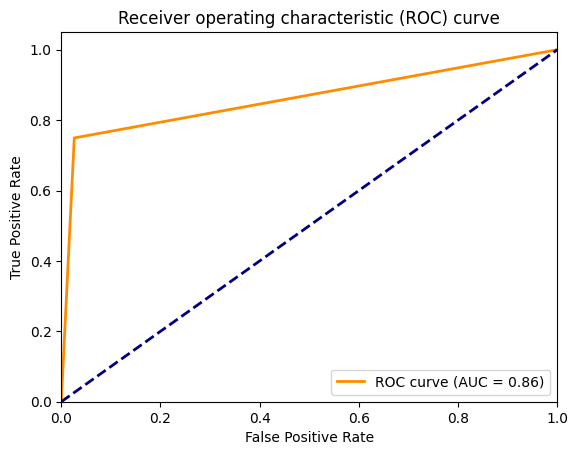

In [12]:
# Accuracy
accuracy = accuracy_score(y_test, y_respuesta)

# Precision
precision = precision_score(y_test, y_respuesta)

# Recall
recall = recall_score(y_test, y_respuesta)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

fpr, tpr, thresholds = roc_curve(y_test, y_respuesta)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [13]:
#KNN
sklearn_classifier = KNeighborsClassifier(n_neighbors=23).fit(X_train, y_train)
y_predKNN = sklearn_classifier.predict(X_test)

Accuracy: 0.97
Precision: 0.99
Recall: 0.63


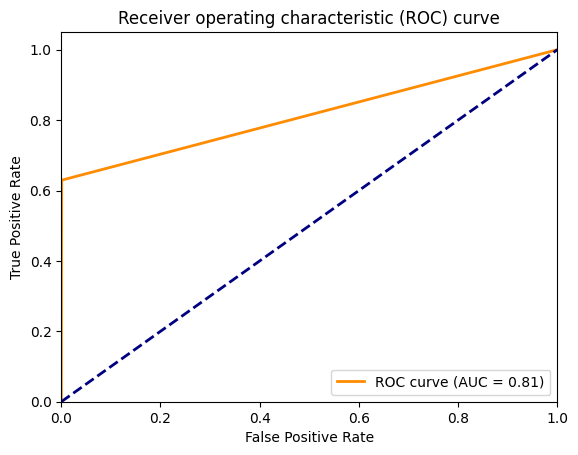

In [14]:
# Accuracy
accuracy = accuracy_score(y_test, y_predKNN)

# Precision
precision = precision_score(y_test, y_predKNN)

# Recall
recall = recall_score(y_test, y_predKNN)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

fpr, tpr, thresholds = roc_curve(y_test, y_predKNN)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#print(classification_report(y_test, y_pred))

In [15]:
#Regresion logica
reglog = LogisticRegression()
reglog.fit(X_train, y_train)
y_predRL = reglog.predict(X_test)

Accuracy: 0.96
Precision: 0.88
Recall: 0.63


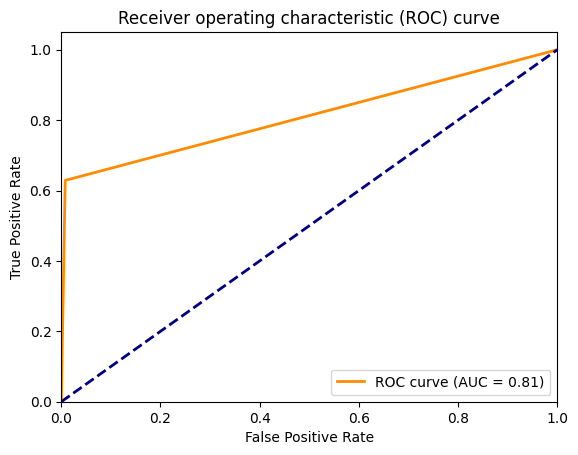

In [16]:
# Accuracy
accuracy = accuracy_score(y_test, y_predRL)

# Precision
precision = precision_score(y_test, y_predRL)

# Recall
recall = recall_score(y_test, y_predRL)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

fpr, tpr, thresholds = roc_curve(y_test, y_predRL)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#print(classification_report(y_test, y_pred))

# 6- Aplicar modelo manual

In [17]:
#KNN manual
class KNearestNeighbors():
    def __init__(self, X_train, y_train, n_neighbors=5, weights='uniform'):

        self.X_train = X_train
        self.y_train = y_train
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.n_classes = 3

    def euclidian_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))

    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []
        point_dist = []
        for x_test in X_test:
            point_dist += [ self.euclidian_distance(x_test, self.X_train) ]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)

    def predict(self, X_test):

        if self.weights == 'uniform':
            neighbors = self.kneighbors(X_test)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])
            return y_pred

        if self.weights == 'distance':

            print("Realice una implementación de distancia")

            return y_pred

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return float(sum(y_pred == y_test)) / float(len(y_test)), y_pred, y_test



In [18]:
# Accuracy
accuracy = accuracy_score(y_test,prediction)

# Precision
precision = precision_score(y_test,prediction)

# Recall
recall = recall_score(y_test, prediction)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

fpr, tpr, thresholds = roc_curve(y_test, prediction)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#print(classification_report(y_test, y_pred))

NameError: name 'prediction' is not defined

In [ ]:
#Regresion logica
class OurLogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
       

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        self.w = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.w)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h-y)) / y.size
            self.w -= self.lr * gradient

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.w))

    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold
    def score(self, y_pred,y_test):
        return float(sum(y_pred == y_test)) / float(len(y_test))

In [ ]:
model = OurLogisticRegression(lr=0.9, num_iter=650)
model.fit(X_train, y_train)
probs = model.predict_prob(X_test)
y_predORL = model.predict(X_test, 0.5)

Accuracy: 0.95
Precision: 0.95
Recall: 0.44


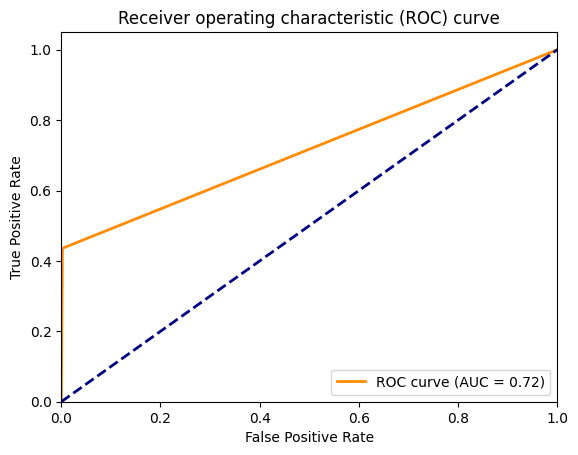

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_predORL)

# Precision
precision = precision_score(y_test, y_predORL)

# Recall
recall = recall_score(y_test, y_predORL)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

fpr, tpr, thresholds = roc_curve(y_test, y_predORL)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#print(classification_report(y_test, y_pred))

In [ ]:
#Arbol de desiciones manul

In [ ]:
# Entrenar el modelo
tree = DecisionTreeOUR(max_depth=5)
#tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
#y_pred = tree.predict(X_test)


# Evaluar el modelo
#print(classification_report(y_test, y_pred))


NameError: name 'DecisionTreeOUR' is not defined

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_predORL)

# Precision
precision = precision_score(y_test, y_predORL)

# Recall
recall = recall_score(y_test, y_predORL)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

fpr, tpr, thresholds = roc_curve(y_test, y_predORL)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#print(classification_report(y_test, y_pred))